<a href="https://colab.research.google.com/github/nkurufabre123/my-first-program/blob/master/Copy_of_Final_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Exam
## Introduction to Data Science
### Kigali, Rwanda
### July 13th, 2019


## First Name: Fabrice
## Last Name: NKURUNZIZA



#### Import Important Libraries

In [0]:
# Models for transforming data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
# Models for classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.ensemble import AdaBoostClassifier

# Models for building neural networks
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
# Function splitting data into train and test
from sklearn.model_selection import train_test_split
# Model for making a data science pipeline 
from sklearn.pipeline import make_pipeline
# Metric for evaluating classifiers
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# Library for computation with numerical data
import numpy as np
# Library for scientific computation
import scipy as sp
# Library for reading and manipulating data
import pandas as pd
# Library for visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
data_df = pd.read_csv('https://raw.githubusercontent.com/onefishy/rwanda_workshop/master/data/final_exam_data.csv')

## The Data

You are provided a dataset of patients in a hospital containing the following information:

1. **E2**: estrogen level in the patient's blood stream
2. **hGH level**: level of a prescribed hormone in the patient's blood stream
3. **family history**: family history of chronic disease
4. **diabetes**: whether or not the patient has diabetes
5. **outcome**: whether or not the patient has renal cancer

The data is located at: `https://raw.githubusercontent.com/onefishy/rwanda_workshop/master/data/final_exam_data.csv`


## The Task 

Your task is to build a classifier to predict whether or not a patient has renal cancer based on the attributes in the dataset.

## Requirements:

1. You must use all available attributes in your model.

2. You must choose an evaluation metric (e.g. accuracy) to evaluate your model and explain why this metric is appropriate for this task and this dataset.

3. You must fit at least three different models for classification for this task and compare their performance under your chosen metric.

4. You must recommend a final model for this classification task and fully justify why you think this is the best model, out of the ones you tested, for this task.

## Instructions for submission:

0. Save the notebook to your GoogleDrive (Click on `File` in the menu and then `Save a copy in Drive`)

1. Write your code, show your results and write your answers in this notebook. Be sure to write text in text boxes and code in code boxes. Make sure that results are displayed in readable formats.

2. Share the notebook, when completed, with **weiweipan@g.harvard.edu** by midnight Friday. Late submission and email submissions will not be accepted.

You may use notes from class, example code and internet resources. You may discuss the exam with each other but you may not copy code from each other (submissions suspected of cheating will not be graded).

**Get the size of the dataframe**

Let us first get the size of data frame, this will help us to know how many observations and attributes are in our dataset

In [0]:
data_df.shape

(13626, 5)

as we can observe, we have 13, 626 observations and 5 attributes 


**Print the first 10 rows of the dataframe**

Now we are inspecting the data we've read

In [0]:
data_df.head(n=10)

,E2 level,hGH level,family history,outcome,diabetes
0,8522.086406,16.210865,high blood pressure,0,no
1,17281.680260,3.672162,heart disease,0,no
2,630.682920,24.712037,high cholestrol,0,yes
3,2203.150338,27.982018,high cholestrol,0,yes
4,10457.204723,7.631855,heart disease,0,no
5,1290.982680,20.932113,high cholestrol,0,yes
6,16347.297075,21.888827,high cholestrol,0,no
7,11229.414829,14.155399,high blood pressure,0,no
8,17030.285806,16.839135,high blood pressure,0,no
9,16824.699416,11.540856,high blood pressure,0,no


It seems that E2 and hGH level  variables are continous type, while remaining variables seems to be categorical type

**Summarize the DataFrame**
this part help us to compute summary stastics like mean, standard deviation ..and have an idea of data distribution

In [0]:
data_df.describe()

,E2 level,hGH level,outcome
count,13626.000000,13626.000000,13626.000000
mean,11288.657895,13.986700,0.112432
std,7772.639989,9.014058,0.315909
min,-15912.945555,-17.713080,0.000000
25%,5840.811284,7.531092,0.000000
50%,11096.010410,13.713171,0.000000
75%,16587.975903,20.080304,0.000000
max,36752.153723,49.106807,1.000000


**Check for missing values**

In [0]:
np.sum(data_df.isna())

E2 level          0
hGH level         0
family history    0
outcome           0
diabetes          0
dtype: int64

it seems that we don't have any missing values, then we keep all our columns 

**Exploratory Data Analysis**

**Categorization of the Attributes**

In order to check the type of a column or attribute, let us  print out the first 20 number of values and visually examine them.

In [0]:
numeric = ['E2 level', 'hGH level']
categorical = ['family history', 'diabetes']
outcome = ['outome']

In [0]:
data_df['E2 level'][:5], data_df['hGH level'][:5]

(0     8522.086406
 1    17281.680260
 2      630.682920
 3     2203.150338
 4    10457.204723
 Name: E2 level, dtype: float64, 0    16.210865
 1     3.672162
 2    24.712037
 3    27.982018
 4     7.631855
 Name: hGH level, dtype: float64)

In [0]:
data_df['family history'].unique(), data_df['outcome'].unique(), data_df['diabetes'].unique()

(array(['high blood pressure', 'heart disease', 'high cholestrol'],
       dtype=object), array([0, 1]), array(['no', 'yes'], dtype=object))

**Visualizion of distributions**
(1) Continous variables: E2 level & hGH level

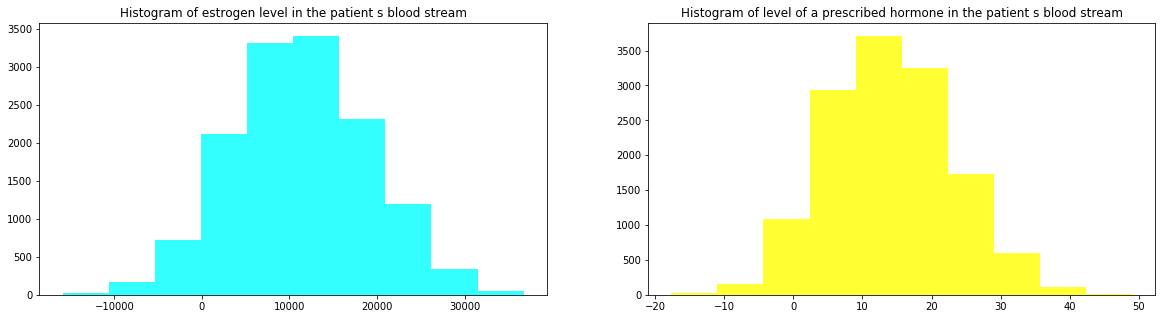

In [0]:
fig, ax = plt.subplots (1, 2, figsize=(20, 5))
# plot histogram of the 'E2 level' column with 10 bins on axis 0
ax[0].hist(data_df['E2 level'].dropna().values, bins=10, color='cyan', alpha=0.8)
# set the title on axis 0
ax[0].set_title('Histogram of estrogen level in the patient s blood stream')

# plot histogram of the 'hGH level' column with 10 bins on axis 1
ax[1].hist(data_df['hGH level'].dropna(), bins=10, color='yellow', alpha=0.8)
# set the title on axis 0
ax[1].set_title('Histogram of level of a prescribed hormone in the patient s blood stream')
plt.show()

**Visualizion of distributions**
(2) Categorical variables: Family history, Outcome & Diabetes

In [0]:
value_counts = data_df['family history'].value_counts(dropna=True)
value_counts


high blood pressure    5454
heart disease          4729
high cholestrol        3443
Name: family history, dtype: int64

In [0]:
value_counts = data_df['outcome'].value_counts(dropna=True)
value_counts


0    12094
1     1532
Name: outcome, dtype: int64

In [0]:
value_counts = data_df['diabetes'].value_counts(dropna=True)
value_counts

no     10686
yes     2940
Name: diabetes, dtype: int64

Now we can visualize the counts as a bar graph.

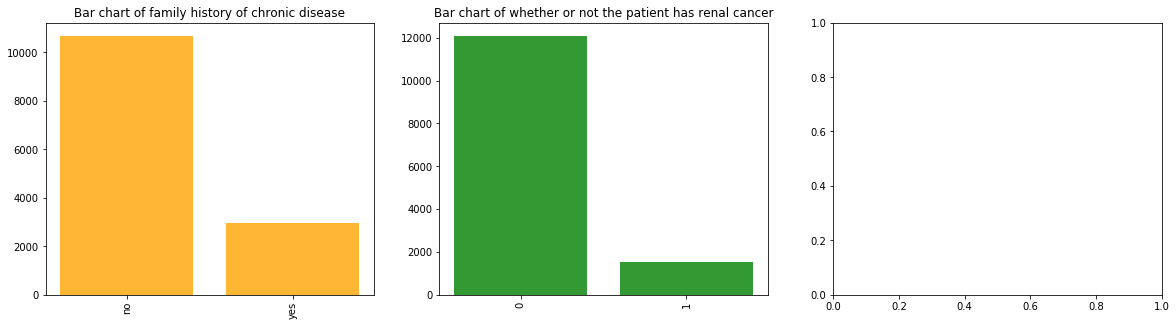

[Text(0.0, 0, 'no'), Text(0.2, 0, 'yes')]

In [0]:
fig, ax = plt.subplots (nrows=1, ncols=3, figsize=(20, 5))
number_of_values = len(value_counts)
# plot bar graph of the 'family history'
ax[0].bar(range(number_of_values), value_counts.values, color='orange', alpha=0.8)
# set the title on axis 0
ax[0].set_title('Bar chart of family history of chronic disease')
# draw the correct number of ticks on the x-axis, one for each bar
ax[0].set_xticks(range(number_of_values))
# rotate the labels of the bars so that they are legible
ax[0].set_xticklabels(value_counts.index, rotation='vertical')


value_counts = data_df['outcome'].value_counts(dropna=True)
number_of_values = len(value_counts)
# plot bar graph of the 'outcome'
ax[1].bar(range(number_of_values), value_counts.values, color='green', alpha=0.8)
# set the title on axis 0
ax[1].set_title('Bar chart of whether or not the patient has renal cancer')
# draw the correct number of ticks on the x-axis, one for each bar
ax[1].set_xticks(range(number_of_values))
# rotate the labels of the bars so that they are legible
ax[1].set_xticklabels(value_counts.index, rotation='vertical')
plt.show()

value_counts = data_df['diabetes'].value_counts(dropna=True)
number_of_values = len(value_counts)
# plot bar graph of the 'diabetes'
ax[2].bar(range(number_of_values), value_counts.values, color='red', alpha=0.8)
# set the title on axis 0
ax[2].set_title('Bar chart of whether or not the patient has diabetes')
# draw the correct number of ticks on the x-axis, one for each bar
ax[2].set_xticks(range(number_of_values))
# rotate the labels of the bars so that they are legible
ax[2].set_xticklabels(value_counts.index, rotation='vertical')

**Dataset cleaning for modeling**


In [0]:
# select the numerical columns
numeric_columns = data_df[['E2 level', 'hGH level']]
# print out the first rows of the numerical dataframe
numeric_columns.head()

,E2 level,hGH level
0,8522.086406,16.210865
1,17281.680260,3.672162
2,630.682920,24.712037
3,2203.150338,27.982018
4,10457.204723,7.631855


In [0]:
# convert categorical columns to numerical columns by one-hot encoding
one_hot_categorical = pd.get_dummies(categorical_columns, prefix=['family history', 'diabetes'])
# print out the first rows of the one-hot encoded dataframe
one_hot_categorical.head()

,family history_heart disease,family history_high blood pressure,family history_high cholestrol,diabetes_no,diabetes_yes
0,0,1,0,1,0
1,1,0,0,1,0
2,0,0,1,0,1
3,0,0,1,0,1
4,1,0,0,1,0


In [0]:
# concatenate numerical columns and one-hot-encoded categorical columns
covariates = pd.concat([numeric_columns, one_hot_categorical], axis=1)
# print out the first rows of this new dataframe
covariates.head()

,E2 level,hGH level,family history_heart disease,family history_high blood pressure,family history_high cholestrol,diabetes_no,diabetes_yes
0,8522.086406,16.210865,0,1,0,1,0
1,17281.680260,3.672162,1,0,0,1,0
2,630.682920,24.712037,0,0,1,0,1
3,2203.150338,27.982018,0,0,1,0,1
4,10457.204723,7.631855,1,0,0,1,0


In [0]:
# select the categorical columns
categorical_columns = data_df[['family history', 'diabetes']]
# print out the first rows of the categorical dataframe
categorical_columns.head()

,family history,diabetes
0,high blood pressure,no
1,heart disease,no
2,high cholestrol,yes
3,high cholestrol,yes
4,heart disease,no


In [0]:
np.sum(data_df.isna())

E2 level          0
hGH level         0
family history    0
outcome           0
diabetes          0
dtype: int64

In [0]:
# replace the NaN values in x with zero
covariates = covariates.fillna(0)
# get the values of the covariates
x = covariates

**Preparing the targets**

In [0]:
# extract the column that contains our target
target = data_df['outcome'].values
# print out the first 10 values as a sanity check
target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
# convery the 0, 1 values in the label into integers
y = target.astype(int)

**Building Regression Models**
 
(1)**Fit and Evaluate a Polynomial Logistic Regression Model to the data**


In [0]:
# split our data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

In [0]:
# set the polynomial degree
degree_of_polynomial = 1
# make an instance of the sklearn model for transforming features into polynomial features
polynomial_transform = PolynomialFeatures(degree_of_polynomial, include_bias=False)
# make an instand of the sklearn minmax scaler to scale our data to the same range of values
scaler = MinMaxScaler()
# make an instance of the linear regression model, alpha is the strength of the penalty
logistic = LogisticRegression(C=1.)

In [0]:
polynomial_transform.fit(x_train)
# transform x_train to polynomial x_train
x_train_poly = polynomial_transform.transform(x_train)
# transform x_test to polynomial x_test
x_test_poly = polynomial_transform.transform(x_test)

In [0]:
scaler.fit(x_train_poly)
# scale polynomial features of the training data
x_train_poly_scaled = scaler.transform(x_train_poly)
# scale polynomial features of the testing data
x_test_poly_scaled = scaler.transform(x_test_poly)

In [0]:
# fit a linear regression model to the polynomial features
logistic.fit(x_train_poly, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluation of  the Accuracy of Our Classifier on Testing and Training data**

In [0]:
### evaluate the training and testing performance of your model 
# test accuracy
print('Train accuracy:', logistic.score(x_train_poly, y_train))

# test accuracy
print('Test accuracy:', logistic.score(x_test_poly, y_test))

Train accuracy: 0.8959360280425019
Test accuracy: 0.9072715143428952


**Compare Metrics for Evaluating Classifiers**

In [0]:
# predict using your model
y_train_predict = logistic.predict(x_train_poly)
# test accuracy
print('Train AUC:', roc_auc_score(y_train, y_train_predict))
# predict using your model
y_test_predict = logistic.predict(x_test_poly)
# test accuracy
print('Test AUC:', roc_auc_score(y_test, y_test_predict))

Train AUC: 0.652171430533868
Test AUC: 0.6738608040260933


In [0]:
# test confusion matrix
print('Confusion matrix for the classification on test:\n', confusion_matrix(y_test, y_test_predict))

Confusion matrix for the classification on test:
 [[3892  101]
 [ 316  188]]


**Addressing Class Imbalance**

In [0]:
weights = {0: 1, 1: 8}
logistic = LogisticRegression(C=1., class_weight=weights)

In [0]:
# fit a linear regression model to the polynomial features
logistic.fit(x_train_poly, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight={0: 1, 1: 8}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# predict using your model
y_train_predict = logistic.predict(x_train_poly)
# test accuracy
print('Train AUC:', roc_auc_score(y_train, y_train_predict))
# predict using your model
y_test_predict = logistic.predict(x_test_poly)
# test accuracy
print('Test AUC:', roc_auc_score(y_test, y_test_predict))

Train AUC: 0.8832669814986571
Test AUC: 0.889414362038329


In [0]:
# test confusion matrix
print('Confusion matrix for the classification on test:\n', confusion_matrix(y_test, y_test_predict))

Confusion matrix for the classification on test:
 [[3403  590]
 [  37  467]]


**Interpreting Classifiers**

In [0]:
# get the names of the covariates
feature_names = covariates.columns
feature_coefficients = logistic.coef_

# create a pandas series to store the covariate names and their coefficient values
feature_importance = pd.Series(feature_coefficients.flatten(), index=feature_names)

# order the covariates by the absolute value of their coefficients in descending order
sorted_names = feature_importance.apply(np.abs).sort_values(ascending=False).index

# print the covariates with the top 5 largest coefficients
for name in sorted_names[:5]:
  print('coefficient of {}: {}'.format(name, feature_importance[name]))

coefficient of diabetes_no: -1.5991151662179988
coefficient of family history_high blood pressure: -1.0617497397027547
coefficient of family history_heart disease: -0.48625249960662015
coefficient of family history_high cholestrol: -0.4616378272285787
coefficient of diabetes_yes: -0.4105249003199233


In [0]:
print('the bias term of the logistic regression is: {}'.format(logistic.intercept_[0]))

the bias term of the logistic regression is: -2.009640066537938


**Comparing Different Models of Classification**

**Model 1: Decision tree**

In [0]:
from sklearn.tree import DecisionTreeClassifier as DecisionTree
tree = DecisionTree(max_depth=10, random_state=0)
tree.fit(x_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [0]:
# fit a linear regression model to the polynomial features
logistic.fit(x_train_poly, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight={0: 1, 1: 8}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# predict using your model
y_train_predict = tree.predict(x_train_poly)
# test accuracy
print('Train AUC:', roc_auc_score(y_train, y_train_predict))
# predict using your model
y_test_predict = tree.predict(x_test_poly)
# test accuracy
print('Test AUC:', roc_auc_score(y_test, y_test_predict))

Train AUC: 0.7774378265257159
Test AUC: 0.6827215484240277


In [0]:
# test confusion matrix
print('Confusion matrix for the classification on test:\n', confusion_matrix(y_test, y_test_predict))

Confusion matrix for the classification on test:
 [[3836  157]
 [ 300  204]]


**Model 2: Random forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier as RandomForest
forest = RandomForest(n_estimators=100, max_depth=100, random_state=0)
forest.fit(x_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
# fit a linear regression model to the polynomial features
logistic.fit(x_train_poly, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight={0: 1, 1: 8}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# predict using your model
y_train_predict = forest.predict(x_train_poly)
# test accuracy
print('Train AUC:', roc_auc_score(y_train, y_train_predict))
# predict using your model
y_test_predict = forest.predict(x_test_poly)
# test accuracy
print('Test AUC:', roc_auc_score(y_test, y_test_predict))

Train AUC: 1.0
Test AUC: 0.7112409514269019


In [0]:
# test confusion matrix
print('Confusion matrix for the classification on test:\n', confusion_matrix(y_test, y_test_predict))

Confusion matrix for the classification on test:
 [[3834  159]
 [ 271  233]]


**Model 3:AdaBoost model**

In [0]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost = AdaBoostClassifier(n_estimators=100, random_state=0)
ada_boost.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [0]:
# fit a linear regression model to the polynomial features
logistic.fit(x_train_poly, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight={0: 1, 1: 8}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# predict using your model
y_train_predict = ada_boost.predict(x_train_poly)
# test accuracy
print('Train AUC:', roc_auc_score(y_train, y_train_predict))
# predict using your model
y_test_predict = ada_boost.predict(x_test_poly)
# test accuracy
print('Test AUC:', roc_auc_score(y_test, y_test_predict))

Train AUC: 0.7807665456106923
Test AUC: 0.7739817001180639


In [0]:
# test confusion matrix
print('Confusion matrix for the classification on test:\n', confusion_matrix(y_test, y_test_predict))

Confusion matrix for the classification on test:
 [[3828  165]
 [ 207  297]]


**Recommendion of a final model**

Let us first have **summary** of values

Logistic regression model

*   Train AUC : 0.652
*   Test AUC  :0.673

Logistic regression model (Balanced)

*   Train AUC : 0.883
*   Test AUC  :0.889

Decision tree model

*   Train AUC : 0.777
*   Test AUC  :0.682

Random forest model

*   Train AUC : 1.0 
*   Test AUC  :0.711

AdaBoost model 

*   Train AUC : 0.780
*   Test AUC  :0.773

as we can observe Logistci regression model after weighting is  better model, as it performs better in test compared to its performance in training, and values from traing and test are alsmost the same

